In [3]:
import pandas as pd
import numpy as np
from tqdm import tqdm

In [4]:
old_climate = pd.read_feather('../data/climate_change.feather').set_index('id')
old_cities = pd.read_feather('../data/cities.feather').set_index('id')
old_sub = pd.read_csv('../data/oa_sub_key_words_extended.csv').set_index('id')

old_ids_cities = set(old_cities.index.to_list())
old_ids_climate = set(old_climate.index.to_list())
old_ids_sub = set(old_sub.index.to_list())

print(f'{old_climate.shape[0]:,} in climate table; {len(old_ids_climate):,} unique ids')
print(f'{old_sub.shape[0]:,} in sub table; {len(old_ids_sub):,} unique ids')
print(f'{old_cities.shape[0]:,} in cities table; {len(old_ids_cities):,} unique ids')

1,026,371 in climate table; 1,026,371 unique ids
57,970 in sub table; 57,970 unique ids
22,191 in cities table; 22,191 unique ids


In [2]:
ar6_refs = pd.read_feather('../data/raw/IPCC/AR6_references.feather')

In [3]:
ar6_refs.head()

report  chapter_number                 chapter_title  \
0    WG1               1  Framing, Context and Methods   
1    WG1               1  Framing, Context and Methods   
2    WG1               1  Framing, Context and Methods   
3    WG1               1  Framing, Context and Methods   
4    WG1               1  Framing, Context and Methods   

                                                 doi  \
0                          10.3389/978-2-88963-118-6   
1                          10.1007/978-94-015-9612-1   
2  http://pure.iiasa.ac.at/id/eprint/821/1/XB-78-...   
3                                               None   
4                           10.1002/andp.19003081208   

                                              editor    pages  \
0  Lee, T. and Speich, S. and Lorenzoni, L and Ch...      783   
1                   Stehr, Nico and von Storch, Hans      338   
2                                     Williams, Jill      332   
3      Heymann, M and Gramelsberger, G and Mahony, M      272   
4                                               None  720–732   

          publisher                                              title  \
0   Frontiers Media     OceanObs'19: An Ocean of Opportunity. Volume 1   
1          Springer  Eduard Brückner – The Sources and Consequences...   
2    Pergamon Press  Carbon Dioxide, Climate and Society: Proceedin...   
3  Taylor & Francis  Cultures of Prediction in Atmospheric and Clim...   
4              None  Über die Bedeutung des Wasserdampfes und der K...   

                                                 url  year  ... school  \
0  https://www.frontiersin.org/research-topics/82...  2019  ...   None   
1                                               None  2000  ...   None   
2  http://pure.iiasa.ac.at/id/eprint/821/1/XB-78-...  1978  ...   None   
3                                               None  2017  ...   None   
4                                               None  1900  ...   None   

  mendeley-tags translator  ISSN   DOI  ISBN  note university  date  \
0          None       None  None  None  None  None       None  None   
1          None       None  None  None  None  None       None  None   
2          None       None  None  None  None  None       None  None   
3          None       None  None  None  None  None       None  None   
4          None       None  None  None  None  None       None  None   

  journaltitle  
0         None  
1         None  
2         None  
3         None  
4         None  

[5 rows x 47 columns]

In [17]:
print(f'AR6 references: {ar6_refs.shape[0]:,}')
print(f'Unique AR6 DOIs (doi): {len(ar6_refs["doi"].unique()):,}')
print(f'Unique AR6 DOIs (DOI): {len(ar6_refs["DOI"].unique()):,}')
print(f'Unique AR6 DOIs (DOI | doi): {len(pd.unique(pd.concat([ar6_refs["DOI"], ar6_refs["doi"]]))):,}')
print(f'Missing AR6 DOIs: {sum(ar6_refs["doi"].isnull() & ar6_refs["DOI"].isnull()):,}')
print(f'Unique AR6 Titles: {len(ar6_refs["title"].unique()):,}')
c = len(set([f"{r['title']} | {r.get('doi', r.get('DOI'))}" for _, r in ar6_refs.iterrows()]))
print(f'Unique AR6 Title/DOI combinations: {c:,}')
c = len(set([f"{r['title']} | {r.get('doi', r.get('DOI'))} | {r['year']}" for _, r in ar6_refs.iterrows()]))
print(f'Unique AR6 Title/DOI/year combinations: {c:,}')

AR6 references: 80,771
Unique AR6 DOIs (doi): 26,753
Unique AR6 DOIs (DOI): 26,489
Unique AR6 DOIs (DOI | doi): 50,787
Missing AR6 DOIs: 14,874
Unique AR6 Titles: 61,522
Unique AR6 Title/DOI combinations: 64,699
Unique AR6 Title/DOI/year combinations: 65,373


In [7]:
df_ipcc.head()

doi  \
id                                                 
W3111928067                                 None   
W2346816824              10.5751/es-08422-210223   
W2218267349         10.1016/j.biocon.2015.11.023   
W3120122943           10.1038/s43247-020-00065-8   
W3007774593  10.1146/annurev-earth-071719-055228   

                                                          text  \
id                                                               
W3111928067                                               None   
W2346816824  Abel, N., R. M. Wise, M. J. Colloff, B. H. Wal...   
W2218267349  The future persistence of biodiversity is like...   
W3120122943  Abstract The 2019/20 Black Summer bushfire dis...   
W3007774593  Climate extremes threaten human health, econom...   

                                                         title    py  \
id                                                                     
W3111928067  Farm performance and climate: climate-adjusted...  2017   
W2346816824  Building resilient pathways to transformation ...  2016   
W2218267349  Is this what a climate change-resilient popula...  2016   
W3120122943  Connections of climate change and variability ...  2021   
W3007774593  Climate Extremes and Compound Hazards in a War...  2020   

                                                    source  \
id                                                           
W3111928067                                           None   
W2346816824                            Ecology and Society   
W2218267349                        Biological Conservation   
W3120122943             Communications Earth & Environment   
W3007774593  Annual Review of Earth and Planetary Sciences   

                                                       authors  ipcc_ref  \
id                                                                         
W3111928067  [{'affiliations': [], 'email': None, 'name': '...         2   
W2346816824  [{'affiliations': [], 'email': None, 'name': '...         3   
W2218267349  [{'affiliations': [{'country': 'ES', 'name': '...         4   
W3120122943  [{'affiliations': [{'country': 'AU', 'name': '...         5   
W3007774593  [{'affiliations': [{'country': 'US', 'name': '...        21   

                 matched      ipcc_src ipcc_doi  \
id                                                
W3111928067  exact_title  AR6-WG2-Ch11     None   
W2346816824          doi  AR6-WG2-Ch11     None   
W2218267349          doi  AR6-WG2-Ch11     None   
W3120122943          doi  AR6-WG2-Ch11     None   
W3007774593          doi  AR6-WG2-Ch11     None   

                                                      ipcc_tit ipcc_pub  \
id                                                                        
W3111928067  Farm performance and climate Climate-adjusted ...     None   
W2346816824  Building resilient pathways to transformation ...     None   
W2218267349  Is this what a climate change-resilient popula...     None   
W3120122943  Connections of climate change and variability ...     None   
W3007774593  Climate Extremes and Compound Hazards in a War...     None   

            ipcc_py  
id                   
W3111928067    2017  
W2346816824    2016  
W2218267349    2016  
W3120122943    2021  
W3007774593    2020

In [6]:
df_cities = pd.read_feather('../data/works_cities.feather').set_index('id')
df_climate = pd.read_feather('../data/works_climate.feather').set_index('id')
df_reviews = pd.read_feather('../data/works_reviews.feather').set_index('id')
df_ipcc = pd.read_feather('../data/ipcc_ar6.feather').set_index('id')

ids_cities = set(df_cities.index.to_list())
ids_climate = set(df_climate.index.to_list())
ids_reviews = set(df_reviews.index.to_list())
ids_ipcc = set(df_ipcc.index.to_list())

print(f'{df_cities.shape[0]:,} in cities table; {len(ids_cities):,} unique ids')
print(f'{df_climate.shape[0]:,} in climate table; {len(ids_climate):,} unique ids')
print(f'{df_reviews.shape[0]:,} in reviews table; {len(ids_reviews):,} unique ids')
print(f'{df_ipcc.shape[0]:,} in ipcc table; {len(ids_ipcc):,} unique ids')

5,283,033 in cities table; 5,283,033 unique ids
1,193,924 in climate table; 1,193,924 unique ids
10,019,131 in reviews table; 10,019,131 unique ids
71,778 in ipcc table; 52,209 unique ids


In [20]:
# df_joined = (
#     df_cities
#     .join(df_climate, on='id', how='outer', rsuffix='_climate', lsuffix='_cities')
#     .join(df_reviews, on='id', how='outer', rsuffix='_reviews')
#     .join(df_ipcc, on='id', how='outer', rsuffix='_ipcc')
#     .replace({np.nan: None})
# )

# df_joined.shape
#(16049336, 17)

In [ ]:
df_cities['publication_year'].hist(range=(1990, 2024), bins=35)

<Axes: >

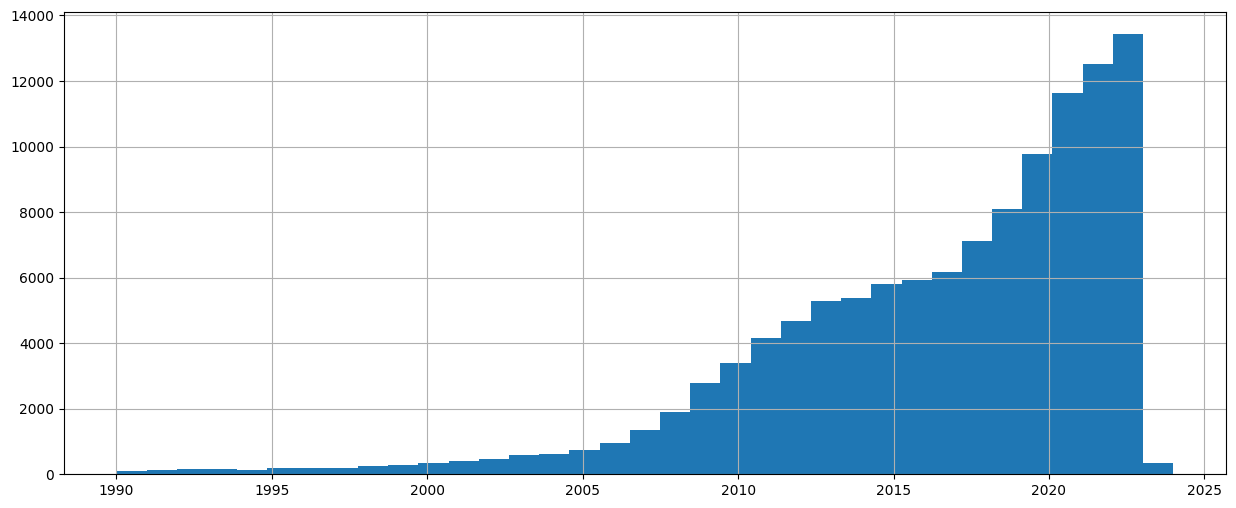

In [26]:
df_cities.join(df_climate, on='id', how='inner', rsuffix='_climate', lsuffix='_cities')['publication_year_cities'].hist(
    range=(1990, 2024), bins=35, figsize=(15, 6))

In [42]:
from itertools import chain, combinations

options = [('cities', ids_cities),
           ('climate', ids_climate),
           ('reviews', ids_reviews),
           ('ipcc', ids_ipcc),
           ('old_climate', old_ids_climate),
           ('old_cities', old_ids_cities),
           ('old_sub', old_ids_sub)]
for combi in chain.from_iterable(combinations(options, r) for r in range(1, len(options) + 1)):
    print([c[0] for c in combi], f'-> {len(set.intersection(*[c[1] for c in combi])):,} works overlap')

['cities'] -> 5,283,033 works overlap
['climate'] -> 1,193,924 works overlap
['reviews'] -> 10,019,131 works overlap
['ipcc'] -> 52,209 works overlap
['old_climate'] -> 1,026,371 works overlap
['old_cities'] -> 22,191 works overlap
['old_sub'] -> 57,970 works overlap
['cities', 'climate'] -> 116,490 works overlap
['cities', 'reviews'] -> 298,732 works overlap
['cities', 'ipcc'] -> 6,391 works overlap
['cities', 'old_climate'] -> 92,269 works overlap
['cities', 'old_cities'] -> 20,706 works overlap
['cities', 'old_sub'] -> 56,793 works overlap
['climate', 'reviews'] -> 82,006 works overlap
['climate', 'ipcc'] -> 26,234 works overlap
['climate', 'old_climate'] -> 981,102 works overlap
['climate', 'old_cities'] -> 21,676 works overlap
['climate', 'old_sub'] -> 56,655 works overlap
['reviews', 'ipcc'] -> 5,050 works overlap
['reviews', 'old_climate'] -> 60,535 works overlap
['reviews', 'old_cities'] -> 925 works overlap
['reviews', 'old_sub'] -> 4,217 works overlap
['ipcc', 'old_climate'] 

In [50]:
from pathlib import Path

mid_files = Path().glob('../data/raw/openalex_merged_ids/*.csv.gz')
df_mids = pd.concat([pd.read_csv(fn, compression='gzip') for fn in mid_files])
ids_merged = set(df_mids['id'].unique())

In [64]:
df_mids

merge_date           id merge_into_id
0     2022-07-18  W3164133144   W4285719527
1     2022-07-18  W3166959377   W4285719527
0     2022-07-27  W3159934294        W21805
1     2022-07-27  W3121891118        W24982
2     2022-07-27    W71719015       W107758
...          ...          ...           ...
1650  2023-12-19  W4291272724   W4386406551
1651  2023-12-19  W4382447835   W4386406551
1652  2023-12-19  W4288371062   W4386406551
1653  2023-12-19  W4307357848   W4386406551
1654  2023-12-19  W4360834506   W4386864302

[12559471 rows x 3 columns]

In [51]:
from itertools import chain, combinations

options = [('cities', ids_cities),
           ('climate', ids_climate),
           ('reviews', ids_reviews),
           ('ipcc', ids_ipcc),
           ('old_climate', old_ids_climate),
           ('old_cities', old_ids_cities),
           ('old_sub', old_ids_sub),
           ('merged', ids_merged)]

for on, o in options:
    print(f'{on} -> {len(o):,} works')
    print(f'  & merged -> {len(o & ids_merged):,} works')

# for combi in chain.from_iterable(combinations(options, r) for r in range(1, 3)):
#     print([c[0] for c in combi], f'-> {len(set.intersection(*[c[1] for c in combi])):,} works overlap')


cities -> 5,283,033 works
  & merged -> 0 works
climate -> 1,193,924 works
  & merged -> 0 works
reviews -> 10,019,131 works
  & merged -> 6 works
ipcc -> 52,209 works
  & merged -> 0 works
old_climate -> 1,026,371 works
  & merged -> 27,848 works
old_cities -> 22,191 works
  & merged -> 151 works
old_sub -> 57,970 works
  & merged -> 356 works
merged -> 12,559,471 works
  & merged -> 12,559,471 works


In [ ]:
# overlap instead of for ids on title slug + year
c = len(set([f"{r['title']} | {r.get('doi', r.get('DOI'))} | {r['year']}" for _, r in ar6_refs.iterrows()]))

check for the 2% missing works are, e.g. source and PY

In [67]:
# works_ids that disappeared without explanation from the climate change query
ids_gone = old_ids_climate - ids_climate - ids_merged
print(f'num missing: {len(ids_gone):,}')

num missing: 17,421


In [72]:
old_climate

title  \
id                                                               
W9999146     Industrial Applications of Plant-Wide Equation...   
W999906588   Climate change scenarios and behavioural chang...   
W99983976    NASA Finds 2013 Sustained Long-Term Climate Wa...   
W99983702          A Mechanism for Decadal Climate Variability   
W99982958    Lessons to be learned from uncertainty treatme...   
...                                                        ...   
W1000200014     On Sea Levels and Global Temperature Anomalies   
W100009937              Can Global Warming Be Studied Too Much   
W1000071398  Preliminary study on environmental magnetism o...   
W1000064551  Feasibility study of calibration strategy for ...   
W100006201   Using a process-based model, ParopSys, to pred...   

                                                      abstract  \
id                                                               
W9999146     Mathematical models of industrial processes ha...   
W999906588   In constructing normative scenarios images of ...   
W99983976                                                 None   
W99983702    We describe in this paper a mechanism for deca...   
W99982958                                                 None   
...                                                        ...   
W1000200014  Global sea level behavior is addressed in term...   
W100009937                                                None   
W1000071398  The study on global changes is an important in...   
W1000064551  Abstract The calibration and quantitative meas...   
W100006201   The eucalypt leaf beetle, Paropsis atomaria Ol...   

             publication_year             type  \
id                                               
W9999146               2011.0     book-chapter   
W999906588             2008.0             None   
W99983976              2014.0             None   
W99983702              1996.0     book-chapter   
W99982958              2010.0     book-chapter   
...                       ...              ...   
W1000200014            2015.0   posted-content   
W100009937             2002.0             None   
W1000071398            1995.0  journal-article   
W1000064551            2015.0  journal-article   
W100006201             2009.0     book-chapter   

                                                           doi  
id                                                              
W9999146     https://doi.org/10.1016/b978-0-12-380985-8.000...  
W999906588                                                None  
W99983976                                                 None  
W99983702          https://doi.org/10.1007/978-3-662-03291-6_6  
W99982958         https://doi.org/10.1007/978-94-007-1670-4_20  
...                                                        ...  
W1000200014                                               None  
W100009937                                                None  
W1000071398            https://doi.org/10.1360/sb1995-40-3-227  
W1000064551         https://doi.org/10.1016/j.ancr.2015.06.003  
W100006201                                                None  

[1026371 rows x 5 columns]

In [75]:
old_climate.loc[list(ids_gone)].head(n=50)

title  \
id                                                               
W2787593383  Microgrids and Resilience to Climate-Driven Im...   
W2218832616  Real-Time Simulation of a Nuclear Power Plant ...   
W2779519247  Morphological and Compositional Design of Pd-C...   
W156053916   ยุทธศาสตร์การบริหารจัดการองค์กรเชิงบูรณาการและ...   
W105818004   Assessing Net Ecosystem Exchange of Carbon Dio...   
W3167734163  Fluid Invasion Dynamics in Porous Media With C...   
W2804901275  Ecosystem-based Adaptation: A review of the co...   
W2563891439  Assessment of the Uncertainties in Arctic Low-...   
W4294191177  Constitutive Modelling and Thermomechanical Ca...   
W2958006520  Chapitre 2. Climat, obstacles à l’action et re...   
W3014539709  Análisis espacial (1987- 2017) y predictivo (2...   
W111205546                   The Coastal Area in Global Change   
W2888794927  Predicting Effective Diffusion Coefficients in...   
W3119042289  Seasonal Variability in Local Carbon Dioxide B...   
W2274417762  GaN-based Nanorods: From High-Gain Photoconduc...   
W3113879722  Evaluation environnementale des élevages bovin...   
W2077443607    Causal narratives and policy in a warming world   
W4221030816                Technical correction for bg-2022-22   
W124755926           Coming to the fields near you? Fuel farms   
W2173122179  The Role of Abiotic Stresses in the Decline of...   
W2905365364  Extinguish the Coal Flame? The Impact of a Lig...   
W2539328258  An evaluation of hydrocarbon deposit tightness...   
W3027746136  Inequality of water allocation and policy resp...   
W4206701618                            Comment on gmd-2021-385   
W3164401914  Consolidating Drought Projections—Eastern Aust...   
W1969628804  A Turbulent Jet Chemical Reaction Model: NOx P...   
W605791374   Solar and heat protection techniques. Evaluati...   
W2034021293  Nitric oxide emission from a Norway spruce for...   
W2544896834  The Concept of the Entrepreneurial University ...   
W2089336857  The Influence of CO2 Solubility in Brine on CO...   
W4200021148  Do tree species affect decadal changes in soil...   
W2726312647  South Korea's nuclear U-turn draws praise and ...   
W1568076239   Combustion of Pulverized Fuel in a CO2Atmosphere   
W2760865378  Estimation of fracture distribution in a CO2 -...   
W996686083   Sustainable Forestry as a Source of Bio-energy...   
W4289601120  Assessing Coastal Urban Sprawl and the “Linear...   
W2033851267  Tidal signatures in temperature data from CRIS...   
W2491160999  Maritime Logistics in EU Green Ports and Short...   
W2284225959  Use of Future Scenarios as a Pedagogical Appro...   
W2129603452  Energy consumption inequality and human develo...   
W2965338051  Ultrasonic Plastic Welding of Dissimilar Mater...   
W2135050929  Glacial trees from the La Brea tar pits show p...   
W3091249027  The CEE Energy Transition: Recurring Fifty-Yea...   
W4293203643  Impact of Land Use Land Cover on Land Surface ...   
W2127154971  NO/sub x/ concentration using adsorption and n...   
W2137046267  Modelling root architecture: are there tradeof...   
W4200418797  Advanced nuclear fuel cycles: New methodologie...   
W4206960148  First aid guidelines for environmental topics:...   
W2159589096  Climatic and Anthropogenic Impacts on Water an...   
W4221000501                              Comment on tc-2022-18   

                                                      abstract  \
id                                                               
W2787593383  “Resilience” has burst into the lexicons of se...   
W2218832616  AbstractThe U.S. Nuclear Regulatory Commission...   
W2779519247  Electrochemical conversion of carbon dioxide (...   
W156053916   บทคดยอ วตถประสงคของงานวจยนคอ (1) ศกษายทธศาสตรก...   
W105818004   AbstractThe quantification of net ecosystem ex...   
W3167734163  Multiphase flow is important for many natural ...   
W2804901275  Abstract In the international climate policy a...   
W2563891439  The variation of 

In [77]:
old_climate.loc['W2274417762']['abstract']

'Among the alternative energy sources, photo-electrochemical (PEC) cells are advantageous due to the possibility to convert light to hydrogen without carbon emission. Here, I will present the PEC mode of solar hydrogen generation using GaN, in both forms of epitaxial films and nanowires, as well as their related heterostructures. The III-nitride semiconductors, such as GaN and InGaN, are promising for PEC for the following reasons. First, GaN demonstrates considerable resistance to corrosion in many aqueous solutions and its band edge potentials are situated in positions that allow for zero-bias hydrogen generation. Although the band gap of GaN is high at 3.4 eV, it may be tuned through the incorporation of indium to enhance optical absorption in the visible range. Moreover, several merits of their nanostructured forms have been demonstrated. For instance, the GaN nanowires (GaN NWs) exhibit very high photocurrent gain, efficient charge transfer in electrochemical environment. PEC prop

In [20]:
old_climate.loc['W4313120036']

title               Evaluation of the Groundwater Resources in the...
abstract            AbstractThe deficit of freshwater represents a...
publication_year                                               2022.0
type                                                     book-chapter
doi                       https://doi.org/10.1007/978-3-031-12676-5_2
Name: W4313120036, dtype: object

In [37]:
import json

total = 0
missed = 0
changed_tit = 0
changed_abs = 0
shorter_now = 0
longer_now = 0
abs_disapp = 0
abs_app = 0
ls = []
with open('../data/raw/missed_documents.jsonl') as f:
    for line in f:
        obj = json.loads(line)
        total += 1
        if obj['work'] is not None:
            match = old_climate.loc[obj['work']['id']]
            ma = match.get('abstract') if match is not None else None
            oa = obj['work'].get('abstract') if obj['work'] is not None else None
            
            ot = obj['work'].get('title') if obj['work'] is not None else None
            mt = match.get('title') if match is not None else None

            ls.append({
                'id': obj['work']['id'],
                'old_abs': ma,
                'new_abs': oa,
                'old_tit': mt,
                'new_tit': ot
            })
            if ot != mt:
                changed_tit += 1
            if oa != ma:
                changed_abs += 1
            if oa is not None and ma is not None and len(oa) < len(ma):
                shorter_now += 1
            if oa is not None and ma is not None and len(oa) > len(ma):
                longer_now += 1
            if oa is None and ma is not None:
                abs_disapp += 1
            if oa is not None and ma is None:
                abs_app += 1
        else:
            missed += 1
print(f'not in new query result, not in merged_ids: {total :,}')
print(f'ID missing now: {missed:,}')
print(f'changed title: {changed_tit :,}')
print(f'changed abstract: {changed_abs :,}')
print(f'abstract shrank: {shorter_now :,}')
print(f'abstract grew: {longer_now :,}')
print(f'abstract disappeared: {abs_disapp :,}')
print(f'abstract appeared: {abs_app :,}')

not in new query result, not in merged_ids: 17,421
ID missing now: 16
changed title: 2,709
changed abstract: 14,908
abstract shrank: 6,997
abstract grew: 6,008
abstract disappeared: 1,669
abstract appeared: 106


In [38]:
d = pd.DataFrame(ls).set_index('id')

In [41]:
d

old_abs  \
id                                                               
W2406205764  Standing before exasperated delegates on June ...   
W2360599389  The process of atomic hydrogen emission in CH4...   
W2049019841  Studies that have attempted to estimate source...   
W2108812250  The goal of the "Opportunities for Catalysis R...   
W3176899167  Industrialization and modernization of agricul...   
...                                                        ...   
W2045122271  Methane fermentation of napiergrass (Pennisetu...   
W4224935863  Shoreline changes are associated with natural ...   
W2802893931  This chapter discusses the complex relation of...   
W2548425919  Most communication happens via anecdotes and s...   
W3209250645  Extreme weather events induced by climate chan...   

                                                       new_abs  \
id                                                               
W2406205764  Standing before exasperated delegates on June ...   
W2360599389  The process of atomic hydrogen emission in CH4...   
W2049019841  Studies that have attempted to estimate source...   
W2108812250  ADVERTISEMENT RETURN TO ISSUEPREVArticleNEXTCa...   
W3176899167  Industrialization and modernization of agricul...   
...                                                        ...   
W2045122271  東京, 名古屋, 福岡, 宮崎, 那覇及び西表島で栽培した植付け当年のネピアグラス (Pen...   
W4224935863  Shoreline changes are associated with natural ...   
W2802893931                                               None   
W2548425919                                               None   
W3209250645  Adverse circumstances such as extreme weather ...   

                                                       old_tit  \
id                                                               
W2406205764  The Persistence of Old Problems: The Politics ...   
W2360599389  [Atomic hydrogen emission line and the high qu...   
W2049019841  What is the concentration footprint of a tall ...   
W2108812250  Catalysis Research of Relevance to Carbon Mana...   
W3176899167  Myco-remediation: A mechanistic understanding ...   
...                                                        ...   
W2045122271  Availability of napiergrass as a raw material ...   
W4224935863  Effect of alongshore sediment supply gradients...   
W2802893931                              Knowledge and Climate   
W2548425919                   Language, Frames, and Narratives   
W3209250645  Load Restoration in Islanded Microgrids: Formu...   

                                                       new_tit  
id                                                              
W2406205764  The Persistence of Old Problems: The Politics ...  
W2360599389  [Atomic hydrogen emission line and the high qu...  
W2049019841  What is the concentration footprint of a tall ...  
W2108812250  Catalysis Research of Relevance to Carbon Mana...  
W3176899167  Myco-remediation: A mechanistic understanding ...  
...                                                        ...  
W2045122271  Availability of napiergrass as a raw material ...  
W4224935863  Effect of alongshore sediment supply gradients...  
W2802893931                              Knowledge and Climate  
W2548425919                   Language, Frames, and Narratives  
W3209250645  Load Restoration in Islanded Microgrids: Formu...  

[17405 rows x 4 columns]